# Figure S19 Code

In [1]:
import importlib
import itertools
import matplotlib as plt
import functions_paper_1_MEE
from functions_paper_1_MEE import *
import rushd as rd
import seaborn as sns
exec(open("functions_paper_1_MEE.py").read())
sns.set_context('paper')
from statannot import add_stat_annotation
import openpyxl

In [ ]:
# Set paths to the experiment folder and where to find the data
datadir = Path(Path('../../datadir_mee.txt').read_text())
base_path = datadir/'instruments'/'data'/'attune'/'Mary'

Plates = {
    '2024.08.22_rep2_rtTA_titrate': ['Plate1'],
'2024.05.13_exp09.02_rTTA_titrate': ['Plate3'],
'2024.05.30_exp09.06_300_500_CAGrTTA': ['Plate3_CAGrTTA'],
'2024.06.03_exp09.07_300_CAG_rtTA': ['Plate2_CAG_rtTA_new'],
'2024.06.28_exp09.12_Nested_Cag_rtTA': ['Plate2_CAG_rtTA']
}

exp_path = []
yaml_path = []

for i in Plates:
    for j in Plates[i]:
        exp_path.append(base_path/i/j/'export_singlets')
        yaml_path.append(base_path/i/j/'export_singlets'/'well_metadata.yaml')

output_path = output_path = './figs_2024_promoter_editing_paper/figureS19_TET_DIAL/'


plates_dict = pd.DataFrame({
    'data_path' : [exp for exp in exp_path],
    'yaml_path' : [yaml for yaml in yaml_path]
})

**Load in dataframe that has different channel name and rename it**

Comment out columns=channel_list for troubleshooting


In [ ]:
file_path = base_path/'2024.05.19_exp09.04_rTTA_titrate_2'/'Plate1'/'export_singlets'
yaml_path = file_path/'well_metadata.yaml'
data2 = pd.DataFrame()
channel_list1 = ['mCherry-A', 'mGL-A', 'iRFP670-A', 'FSC-A', 'SSC-A','TagBFP-A']
data2 = rd.flow.load_csv_with_metadata(file_path, yaml_path, columns=channel_list1)
# Remove negative values from dataframe
for c in channel_list1: data2 = data2[data2[c] > 0]

# Remove NaN values
data2.dropna(inplace=True)
data2 = data2.rename(columns={'mCherry-A': 'mRuby2-A'})


In [ ]:
#Load data
data1 = pd.DataFrame()

channel_list = ['mRuby2-A', 'mGL-A', 'iRFP670-A', 'FSC-A', 'SSC-A', 'TagBFP-A']
data1 = rd.flow.load_groups_with_metadata(plates_dict,columns=channel_list) #Could add in columns=channel_list here to get specific columns


# Remove negative values from dataframe
for c in channel_list: data1 = data1[data1[c] > 0]

# Remove NaN values
data1.dropna(inplace=True)


c:\Users\chemegrad202\AppData\Local\Programs\Python\Python312\Lib\site-packages\rushd\flow.py:166: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat(data_list, ignore_index=True).replace(np.NaN, pd.NA)  # type: ignore


In [7]:
data = pd.concat([data1, data2], ignore_index=True)
display(data)

,reporter,rTTA,rTTA#,DOX,DOX#,CRE,Date,well,population,FSC-A,SSC-A,mGL-A,iRFP670-A,TagBFP-A,mRuby2-A
0,lox203-3G,EFS-0.5x,0.5,1x,1,+CRE,2024.08.22.x,A1,Single Cells,551607.0,187865.0,281.0,6043.0,119,16
1,lox203-3G,EFS-0.5x,0.5,1x,1,+CRE,2024.08.22.x,A1,Single Cells,595549.0,267836.0,6751.0,36395.0,63,53
2,lox203-3G,EFS-0.5x,0.5,1x,1,+CRE,2024.08.22.x,A1,Single Cells,493409.0,157060.0,28.0,48.0,63,42
3,lox203-3G,EFS-0.5x,0.5,1x,1,+CRE,2024.08.22.x,A1,Single Cells,467311.0,140792.0,83.0,859.0,3,46
4,lox203-3G,EFS-0.5x,0.5,1x,1,+CRE,2024.08.22.x,A1,Single Cells,360092.0,125337.0,30.0,5608.0,60,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6677261,loxCN-3G,EFS-0x,0.0,1x,1,+CRE,2024.05.19.x,H9,Single Cells,408361.0,437633.0,24.0,18740.0,25,24
6677262,loxCN-3G,EFS-0x,0.0,1x,1,+CRE,2024.05.19.x,H9,Single Cells,208026.0,204488.0,128.0,9.0,121,34
6677263,loxCN-3G,EFS-0x,0.0,1x,1,+CRE,2024.05.19.x,H9,Single Cells,459814.0,462116.0,119.0,25.0,56,61
6677264,loxCN-3G,EFS-0x,0.0,1x,1,+CRE,2024.05.19.x,H9,Single Cells,67511.0,222846.0,72.0,5.0,45,23


**Adding additional conditions to the dataframe to plot by**

In [9]:
data['conds'] = data['reporter'] + '-' +data['rTTA']+'.' + data['CRE']
data['cond4'] = data['reporter'] +'.' + data['CRE']

**Gating data based on co-transfection marker**

In [10]:
# Set gates for data analysis
iRFP670_gate = 10000
mGL_gate = 200

# Gating on co-transfection marker
data_gated = data.loc[data['iRFP670-A'] > iRFP670_gate]

# Adding positive markers for mGL positive cells
data_gated['mGL_gate'] = np.where(data_gated['mGL-A'] > mGL_gate, '+', '-') 

C:\Users\chemegrad202\AppData\Local\Temp\ipykernel_30636\3770637561.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gated['mGL_gate'] = np.where(data_gated['mGL-A'] > mGL_gate, '+', '-')


# Summary Statistics 

**Calculate statistics on gated data and mGL data**

In [ ]:
df = data_gated[data_gated['Date'] != '2024.08.22.x'] #choose dataframe, exclude bad rep

# These lines are added since some of the values are not considered numbers in the dataframe
df['mGL-A'] = df['mGL-A'].astype(float)
df['TagBFP-A'] = df['TagBFP-A'].astype(float)
df['mRuby2-A'] = df['mRuby2-A'].astype(float)

#Decide how to group. The last parameter will be the condition that it is group by by last ('well' or 'bioreplicate')
by = ['reporter','rTTA', 'rTTA#','DOX#','CRE','conds','cond4', 'Date'] #how to filter results, columns 

x = ['mGL-A','TagBFP-A', 'mRuby2-A'] #which parameter to calculate results on
stat = [sp.stats.gmean,np.median, np.std, np.mean] #statistics to calculate
s_well = calc_stats(df,by,x,stat) #calculate statistics 


C:\Users\chemegrad202\AppData\Local\Temp\ipykernel_30636\1744858762.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mGL-A'] = df['mGL-A'].astype(float)
C:\Users\chemegrad202\AppData\Local\Temp\ipykernel_30636\1744858762.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TagBFP-A'] = df['TagBFP-A'].astype(float)
C:\Users\chemegrad202\AppData\Local\Temp\ipykernel_30636\1744858762.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

**Palette information for rtTA titration**

In [ ]:
palette = {'lox203-3G-CAG-1x.-CRE': 'darkgray', 
'lox203-3G-CAG-1x.+CRE': 'black',
'lox203-3G-CAG-0.5x.-CRE': 'darkgray', 
'lox203-3G-CAG-0.5x.+CRE': 'black',
'lox203-3G-CAG-0.25x.-CRE': 'darkgray', 
'lox203-3G-CAG-0.25x.+CRE': 'black',
'lox203-3G-CAG-0.125x.-CRE': 'darkgray', 
'lox203-3G-CAG-0.125x.+CRE': 'black',
'lox203-3G-CAG-0x.-CRE': 'darkgray', 
'lox203-3G-CAG-0x.+CRE': 'black',
'lox203-3G-EFS-1x.-CRE': 'darkgray', 
'lox203-3G-EFS-1x.+CRE': 'black',
'lox203-3G-EFS-0.5x.-CRE': 'darkgray', 
'lox203-3G-EFS-0.5x.+CRE': 'black',
'lox203-3G-EFS-0.25x.-CRE': 'darkgray', 
'lox203-3G-EFS-0.25x.+CRE': 'black',
'lox203-3G-EFS-0.125x.-CRE': 'darkgray', 
'lox203-3G-EFS-0.125x.+CRE': 'black',
'lox203-3G-EFS-0x.-CRE': 'darkgray', 
'lox203-3G-EFS-0x.+CRE': 'black'}

**Normalized EFS MFI**

In [ ]:
bioreps_plot = (['2024.08.22.x', '2024.05.13.x', '2024.05.19.x'])
rtTA = pd.array(['EFS-0x', 'EFS-0.125x','EFS-0.25x','EFS-0.5x', 'EFS-1x']) 
s_normalized_EFS_titrate = pd.DataFrame()


for biorep in bioreps_plot:
    df_biorep = data_gated[(data_gated['Date'] == biorep) & (data_gated['reporter'] == 'lox203-3G')] #choose dataframe
    by = ['reporter', 'rTTA','rTTA#', 'DOX','DOX#','CRE','conds', 'cond4', 'Date']  #how to filter results, columns 
    x = ['mGL-A', 'iRFP670-A','mRuby2-A'] #which parameter to calculate results on
    stat = [sp.stats.gmean] #statistics to calculate
    s_biorep = calc_stats(df_biorep,by,x,stat) #calculate statistics 


    norm_value = s_biorep[ (s_biorep['CRE'] == '-CRE') & (s_biorep['rTTA'] == 'EFS-0.125x') & (s_biorep['reporter'] == 'lox203-3G')]['mGL-A_gmean'].iloc[0]
    print('lox203'+ '-' + 'noCRE value is ' +str(norm_value)+ '- for EFS-01.25x ' + str(biorep))




    def normalize_mGL_gmean(data):

        return data['mGL-A_gmean'] / norm_value


            
    s_biorep['Normalized_mGL-A_gmean'] = s_biorep.apply(normalize_mGL_gmean, axis=1)

    s_normalized_EFS_titrate = pd.concat([s_normalized_EFS_titrate, s_biorep], ignore_index=True)
display(s_normalized_EFS_titrate)


lox203-noCRE value is 97.81858786048304- for EFS-01.25x 2024.08.22.x
lox203-noCRE value is 1922.2785946850097- for EFS-01.25x 2024.05.13.x
lox203-noCRE value is 982.1121451976228- for EFS-01.25x 2024.05.19.x


,reporter,rTTA,rTTA#,DOX,DOX#,CRE,conds,cond4,Date,mGL-A_gmean,iRFP670-A_gmean,mRuby2-A_gmean,Fraction,Count,Normalized_mGL-A_gmean
0,lox203-3G,EFS-0.125x,0.125,1x,1,+CRE,lox203-3G-EFS-0.125x.+CRE,lox203-3G.+CRE,2024.08.22.x,151.507974,34433.900200,53.115547,1.0,9248,1.548867
1,lox203-3G,EFS-0.125x,0.125,1x,1,-CRE,lox203-3G-EFS-0.125x.-CRE,lox203-3G.-CRE,2024.08.22.x,97.818588,25920.427746,47.795210,1.0,4562,1.000000
2,lox203-3G,EFS-0.25x,0.250,1x,1,+CRE,lox203-3G-EFS-0.25x.+CRE,lox203-3G.+CRE,2024.08.22.x,267.187831,35753.684983,55.097592,1.0,22355,2.731463
3,lox203-3G,EFS-0.25x,0.250,1x,1,-CRE,lox203-3G-EFS-0.25x.-CRE,lox203-3G.-CRE,2024.08.22.x,149.484482,26857.693562,49.134177,1.0,10440,1.528181
4,lox203-3G,EFS-0.5x,0.500,1x,1,+CRE,lox203-3G-EFS-0.5x.+CRE,lox203-3G.+CRE,2024.08.22.x,596.537710,39955.173137,62.943225,1.0,23734,6.098409
5,lox203-3G,EFS-0.5x,0.500,1x,1,-CRE,lox203-3G-EFS-0.5x.-CRE,lox203-3G.-CRE,2024.08.22.x,255.997251,28085.253946,52.503277,1.0,12575,2.617061
6,lox203-3G,EFS-0x,0.000,1x,1,+CRE,lox203-3G-EFS-0x.+CRE,lox203-3G.+CRE,2024.08.22.x,52.956657,32975.248251,49.172741,1.0,11428,0.541376
7,lox203-3G,EFS-0x,0.000,1x,1,-CRE,lox203-3G-EFS-0x.-CRE,lox203-3G.-CRE,2024.08.22.x,48.880409,24940.920973,45.581029,1.0,6000,0.499705
8,lox203-3G,EFS-1x,1.000,1x,1,+CRE,lox203-3G-EFS-1x.+CRE,lox203-3G.+CRE,2024.08.22.x,884.698002,29789.027904,65.592167,1.0,6161,9.044273
9,lox203-3G,EFS-1x,1.000,1x,1,-CRE,lox203-3G-EFS-1x.-CRE,lox203-3G.-CRE,2024.08.22.x,334.391121,26071.916258,50.809960,1.0,7089,3.418482


In [ ]:
s_normalized_EFS_titrate.to_excel('FigureS19B_normalized_summary_stats.xlsx', index=False)

**Figure S18D Normalized mGL gmean**

c:\Users\chemegrad202\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\chemegrad202\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


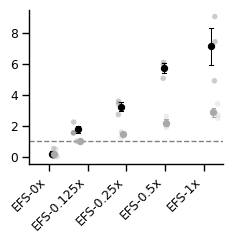

<Figure size 640x480 with 0 Axes>

In [ ]:
xsize = 2.5; ysize=2
EFS = pd.array(['EFS-0x','EFS-0.125x','EFS-0.25x','EFS-0.5x', 'EFS-1x']) 
g = plt.figure(figsize=(xsize,ysize))
data_now = s_normalized_EFS_titrate[(s_normalized_EFS_titrate['rTTA'].isin(EFS)) & (s_normalized_EFS_titrate['reporter'] == 'lox203-3G')]

markers = pd.array(['o','o', 'o','o', 'o','o', 'o','o', 'o','o'])

plt.axhline(y=1, ls='--',lw=1, color='gray')
g = summary_plot( x='rTTA', y='Normalized_mGL-A_gmean', hue='conds', data=data_now, yscale='linear',
                x_rot=45, palette = palette, order=EFS, plottitle='', xlabel='',ylabel='',
                legend=False, markers=markers)

g = g.get_figure()
g.savefig((output_path + 'FigureS19B_fold_change.svg'),bbox_inches='tight')

**Normalized CAG MFI**

In [54]:
bioreps_plot = (['2024.05.30.x', '2024.06.03.x', '2024.06.28.x'])
rtTA = pd.array(['CAG-0x', 'CAG-0.125x','CAG-0.25x','CAG-0.5x', 'CAG-1x']) 
s_normalized_CAG_titrate = pd.DataFrame()


for biorep in bioreps_plot:
    df_biorep = data_gated[(data_gated['Date'] == biorep) & (data_gated['reporter'] == 'lox203-3G') & (data_gated['rTTA'].isin(rtTA) )] #choose dataframe
    by = ['reporter', 'rTTA','rTTA#', 'DOX','DOX#','CRE','conds', 'cond4', 'Date']  #how to filter results, columns 
    x = ['mGL-A', 'iRFP670-A','mRuby2-A'] #which parameter to calculate results on
    stat = [sp.stats.gmean] #statistics to calculate
    s_biorep = calc_stats(df_biorep,by,x,stat) #calculate statistics 


    norm_value = s_biorep[ (s_biorep['CRE'] == '-CRE') & (s_biorep['rTTA'] == 'CAG-0.125x') & (s_biorep['reporter'] == 'lox203-3G')]['mGL-A_gmean'].iloc[0]
    print('lox203'+ '-' + 'noCRE value is ' +str(norm_value)+ '- for CAG-01.25x ' + str(biorep))




    def normalize_mGL_gmean(data):

        return data['mGL-A_gmean'] / norm_value


            
    s_biorep['Normalized_mGL-A_gmean'] = s_biorep.apply(normalize_mGL_gmean, axis=1)

    s_normalized_CAG_titrate = pd.concat([s_normalized_CAG_titrate, s_biorep], ignore_index=True)
display(s_normalized_CAG_titrate)


lox203-noCRE value is 4879.230267859214- for CAG-01.25x 2024.05.30.x
lox203-noCRE value is 2626.5455260496697- for CAG-01.25x 2024.06.03.x
lox203-noCRE value is 3529.0231415148714- for CAG-01.25x 2024.06.28.x


,reporter,rTTA,rTTA#,DOX,DOX#,CRE,conds,cond4,Date,mGL-A_gmean,iRFP670-A_gmean,mRuby2-A_gmean,Fraction,Count,Normalized_mGL-A_gmean
0,lox203-3G,CAG-0.125x,0.125,1x,1,+CRE,lox203-3G-CAG-0.125x.+CRE,lox203-3G.+CRE,2024.05.30.x,10496.311915,70032.232892,44.136708,1.0,38518,2.151223
1,lox203-3G,CAG-0.125x,0.125,1x,1,-CRE,lox203-3G-CAG-0.125x.-CRE,lox203-3G.-CRE,2024.05.30.x,4879.230268,58323.627154,37.856658,1.0,20969,1.000000
2,lox203-3G,CAG-0.25x,0.250,1x,1,+CRE,lox203-3G-CAG-0.25x.+CRE,lox203-3G.+CRE,2024.05.30.x,11285.129891,61447.625614,41.445053,1.0,52296,2.312891
3,lox203-3G,CAG-0.25x,0.250,1x,1,-CRE,lox203-3G-CAG-0.25x.-CRE,lox203-3G.-CRE,2024.05.30.x,4599.309289,60817.656986,38.598643,1.0,29756,0.942630
4,lox203-3G,CAG-0.5x,0.500,1x,1,+CRE,lox203-3G-CAG-0.5x.+CRE,lox203-3G.+CRE,2024.05.30.x,11376.585359,57356.555569,39.618034,1.0,62195,2.331635
5,lox203-3G,CAG-0.5x,0.500,1x,1,-CRE,lox203-3G-CAG-0.5x.-CRE,lox203-3G.-CRE,2024.05.30.x,3473.124881,47307.471992,37.849524,1.0,18672,0.711818
6,lox203-3G,CAG-0x,0.000,1x,1,+CRE,lox203-3G-CAG-0x.+CRE,lox203-3G.+CRE,2024.05.30.x,69.492109,78933.302001,46.166552,1.0,10841,0.014242
7,lox203-3G,CAG-0x,0.000,1x,1,-CRE,lox203-3G-CAG-0x.-CRE,lox203-3G.-CRE,2024.05.30.x,51.391389,69931.191736,41.649850,1.0,13690,0.010533
8,lox203-3G,CAG-1x,1.000,1x,1,+CRE,lox203-3G-CAG-1x.+CRE,lox203-3G.+CRE,2024.05.30.x,9626.200405,60800.972121,43.136128,1.0,77055,1.972893
9,lox203-3G,CAG-1x,1.000,1x,1,-CRE,lox203-3G-CAG-1x.-CRE,lox203-3G.-CRE,2024.05.30.x,4518.322085,60957.888985,39.075257,1.0,43952,0.926032


In [ ]:
s_normalized_CAG_titrate.to_excel('FigureS19A_normalized_summary_stats.xlsx', index=False)

**Figure S18A Normalized CAG mGL gmean**

,reporter,rTTA,rTTA#,DOX,DOX#,CRE,conds,cond4,Date,mGL-A_gmean,iRFP670-A_gmean,mRuby2-A_gmean,Fraction,Count,Normalized_mGL-A_gmean
0,lox203-3G,CAG-0.125x,0.125,1x,1,+CRE,lox203-3G-CAG-0.125x.+CRE,lox203-3G.+CRE,2024.05.30.x,10496.311915,70032.232892,44.136708,1.0,38518,2.151223
1,lox203-3G,CAG-0.125x,0.125,1x,1,-CRE,lox203-3G-CAG-0.125x.-CRE,lox203-3G.-CRE,2024.05.30.x,4879.230268,58323.627154,37.856658,1.0,20969,1.000000
2,lox203-3G,CAG-0.25x,0.250,1x,1,+CRE,lox203-3G-CAG-0.25x.+CRE,lox203-3G.+CRE,2024.05.30.x,11285.129891,61447.625614,41.445053,1.0,52296,2.312891
3,lox203-3G,CAG-0.25x,0.250,1x,1,-CRE,lox203-3G-CAG-0.25x.-CRE,lox203-3G.-CRE,2024.05.30.x,4599.309289,60817.656986,38.598643,1.0,29756,0.942630
4,lox203-3G,CAG-0.5x,0.500,1x,1,+CRE,lox203-3G-CAG-0.5x.+CRE,lox203-3G.+CRE,2024.05.30.x,11376.585359,57356.555569,39.618034,1.0,62195,2.331635
5,lox203-3G,CAG-0.5x,0.500,1x,1,-CRE,lox203-3G-CAG-0.5x.-CRE,lox203-3G.-CRE,2024.05.30.x,3473.124881,47307.471992,37.849524,1.0,18672,0.711818
6,lox203-3G,CAG-0x,0.000,1x,1,+CRE,lox203-3G-CAG-0x.+CRE,lox203-3G.+CRE,2024.05.30.x,69.492109,78933.302001,46.166552,1.0,10841,0.014242
7,lox203-3G,CAG-0x,0.000,1x,1,-CRE,lox203-3G-CAG-0x.-CRE,lox203-3G.-CRE,2024.05.30.x,51.391389,69931.191736,41.649850,1.0,13690,0.010533
8,lox203-3G,CAG-1x,1.000,1x,1,+CRE,lox203-3G-CAG-1x.+CRE,lox203-3G.+CRE,2024.05.30.x,9626.200405,60800.972121,43.136128,1.0,77055,1.972893
9,lox203-3G,CAG-1x,1.000,1x,1,-CRE,lox203-3G-CAG-1x.-CRE,lox203-3G.-CRE,2024.05.30.x,4518.322085,60957.888985,39.075257,1.0,43952,0.926032


c:\Users\chemegrad202\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\chemegrad202\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


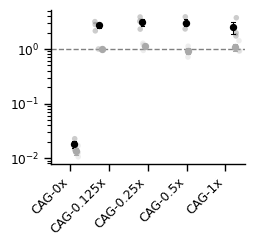

<Figure size 640x480 with 0 Axes>

In [ ]:
xsize = 2.5; ysize=2
CAG = pd.array(['CAG-0x', 'CAG-0.125x','CAG-0.25x','CAG-0.5x', 'CAG-1x']) 
g = plt.figure(figsize=(xsize,ysize))
data_now = s_normalized_CAG_titrate[(s_normalized_CAG_titrate['rTTA'].isin(CAG)) & (s_normalized_CAG_titrate['reporter'] == 'lox203-3G')]
display(data_now)
markers = pd.array(['o','o', 'o','o', 'o','o', 'o','o', 'o','o'])
plt.axhline(y=1, ls='--',lw=1, color='gray')
g = summary_plot( x='rTTA', y='Normalized_mGL-A_gmean', hue='conds', data=data_now, yscale='log',
                x_rot=45, palette = palette, order=CAG, plottitle='', xlabel='',ylabel='',
                legend=False, markers=markers)
g = g.get_figure()
g.savefig((output_path + 'FigureS19A_fold_change.svg'),bbox_inches='tight')

**Figure S19A/B: Summary plot for CAG and EFS rtTA titrations**

c:\Users\chemegrad202\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\chemegrad202\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


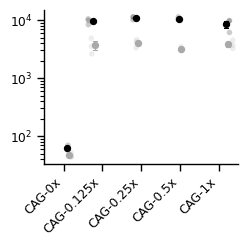

c:\Users\chemegrad202\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\chemegrad202\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 640x480 with 0 Axes>

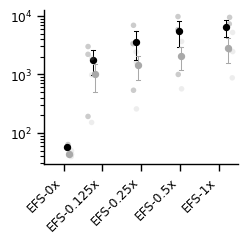

<Figure size 640x480 with 0 Axes>

In [ ]:
xsize = 2.5; ysize=2
rept1 = pd.array(['CAG-0x', 'CAG-0.125x','CAG-0.25x','CAG-0.5x', 'CAG-1x'])


repts = [rept1,rept2]
titles = ['FigureS19A', 'FigureS19B']

pairs_CAG = [
[('CAG-0x','lox203-3G-CAG-0x.+CRE'), ('CAG-0x','lox203-3G-CAG-0x.-CRE')],
[('CAG-0.125x','lox203-3G-CAG-0.125x.+CRE'),('CAG-0.125x','lox203-3G-CAG-0.125x.-CRE')],
[('CAG-0.25x','lox203-3G-CAG-0.25x.+CRE'),('CAG-0.25x','lox203-3G-CAG-0.25x.-CRE')],
[('CAG-0.5x','lox203-3G-CAG-0.5x.+CRE'), ('CAG-0.5x','lox203-3G-CAG-0.5x.-CRE')],
[('CAG-1x','lox203-3G-CAG-1x.+CRE'), ('CAG-1x','lox203-3G-CAG-1x.-CRE')]]

pairs_EFS = [
[('EFS-0x','lox203-3G-EFS-0x.+CRE'), ('EFS-0x','lox203-3G-EFS-0x.-CRE')],
[('EFS-0.125x','lox203-3G-EFS-0.125x.+CRE'),('EFS-0.125x','lox203-3G-EFS-0.125x.-CRE')],
[('EFS-0.25x','lox203-3G-EFS-0.25x.+CRE'),('EFS-0.25x','lox203-3G-EFS-0.25x.-CRE')],
[('EFS-0.5x','lox203-3G-EFS-0.5x.+CRE'), ('EFS-0.5x','lox203-3G-EFS-0.5x.-CRE')],
[('EFS-1x','lox203-3G-EFS-1x.+CRE'), ('EFS-1x','lox203-3G-EFS-1x.-CRE')]]

pairs_list = [pairs_CAG, pairs_EFS]
for i in range(2):
    pairs = pairs_list[i]
    g = plt.figure(figsize=(xsize,ysize))
    data_now = s_well[(s_well['rTTA'].isin(repts[i])) & (s_well['reporter'] == 'lox203-3G')]
    data_now = data_now[data_now['reporter'] == 'lox203-3G']
    markers = pd.array(['o','o', 'o','o', 'o','o', 'o','o', 'o','o'])
    rept = repts[i]
    plottitle = titles[i] + '_titration_summary.svg'
    g = summary_plot( x='rTTA', y='mGL-A_gmean', hue='conds', data=data_now, yscale='log',
                    x_rot=45, palette = palette, order=rept, plottitle='', xlabel='',ylabel='',
                    legend=False, markers=markers)
    g = g.get_figure()
    g.savefig((output_path + plottitle),bbox_inches='tight')


In [21]:
# reporter_list = pd.array(['loxCN-3G', 'lox203-3G'])
# CRE_list = ['+CRE','-CRE','+CRE','-CRE','+CRE','-CRE','+CRE','-CRE','+CRE','-CRE']
# hue_order = []

# for j in range(2):
#     for i in range(16):
#         data_now = data_gated[(data_gated['reporter'] == reporter_list[j]) & ( data_gated['CRE'] == CRE_list[j]) & (data_gated['rTTA'] == rtTA_list[i])].copy()
#         hue_order.append(pd.unique(data_now['conds']))

hue_order_EFS_203_CRE = pd.array(['lox203-3G-EFS-0x.+CRE',
'lox203-3G-EFS-0.125x.+CRE',
'lox203-3G-EFS-0.25x.+CRE',
'lox203-3G-EFS-0.5x.+CRE',
'lox203-3G-EFS-1x.+CRE'])

hue_order_EFS_203_noCRE = pd.array(['lox203-3G-EFS-0x.-CRE', 
'lox203-3G-EFS-0.125x.-CRE', 
'lox203-3G-EFS-0.25x.-CRE', 
'lox203-3G-EFS-0.5x.-CRE', 
'lox203-3G-EFS-1x.-CRE'])

hue_order_CAG_203_CRE = pd.array(['lox203-3G-CAG-0x.+CRE',
'lox203-3G-CAG-0.125x.+CRE',
'lox203-3G-CAG-0.25x.+CRE',
'lox203-3G-CAG-0.5x.+CRE',
'lox203-3G-CAG-1x.+CRE'])

hue_order_CAG_203_noCRE = pd.array(['lox203-3G-CAG-0x.-CRE', 
'lox203-3G-CAG-0.125x.-CRE', 
'lox203-3G-CAG-0.25x.-CRE', 
'lox203-3G-CAG-0.5x.-CRE', 
'lox203-3G-CAG-1x.-CRE'])

hue_order_rtTA = pd.DataFrame({
    'reporter' : ['lox203-3G', 'lox203-3G','lox203-3G', 'lox203-3G'],
    'CRE' : ['-CRE', '+CRE', '-CRE', '+CRE'],
    'hue_order' : [hue_order_EFS_203_noCRE, hue_order_EFS_203_CRE, hue_order_CAG_203_noCRE, hue_order_CAG_203_CRE]
})


**Figure S19C/D: 1-D Histograms for CAG and EFS rtTA at full DOX concentrations**

c:\Users\chemegrad202\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\chemegrad202\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\chemegrad202\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_ke

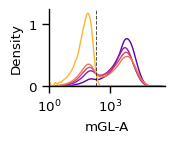

c:\Users\chemegrad202\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\chemegrad202\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\chemegrad202\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_ke

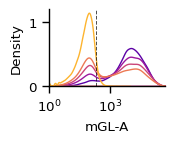

c:\Users\chemegrad202\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\chemegrad202\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\chemegrad202\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_ke

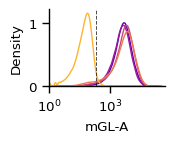

c:\Users\chemegrad202\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\chemegrad202\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\chemegrad202\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_ke

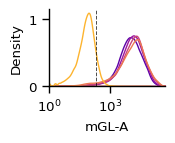

In [ ]:
df = data_gated.copy()
xsize = 1.5
ysize = 1
fontsize=9.600000000000001
xlim = [.1e1, 5e5]
hue_orders_for_rtTA = pd.array([hue_order_EFS_203_noCRE, hue_order_EFS_203_CRE, hue_order_CAG_203_noCRE, hue_order_CAG_203_CRE])
parameters = pd.array(['mGL-A'])
plottitle = pd.array(['FigureS19D-1.svg','FigureS19D-2.svg','FigureS19C-1.svg','FigureS19C-2.svg'])
palette = 'plasma_r'

for i in range(4):
    g = plt.figure(figsize=(xsize,ysize))
    data_now = df[df['conds'].isin(hue_orders_for_rtTA[i])]
    g = custom_hist_plot(data_now, parameters,hue='conds', palette=palette, 
                        hueorder=hue_orders_for_rtTA[i], alpha=0,line=mGL_gate,
                        fontsize=fontsize,xsize=xsize, ysize=ysize, legend=False,
                        xlim=xlim)
    g = g.get_figure()
    g.savefig((output_path + plottitle[i]),bbox_inches='tight')
